In [1]:
# !pip install gdown

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import gdown

# url = "https://drive.google.com/file/d/1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5/view?usp=drive_link"
# gdown.download(url, "data_2.csv",quiet=False)

In [3]:
data = pd.read_csv("data_2.csv")

In [4]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [6]:
data.shape

(175777, 14)

In [7]:
data.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [8]:
data.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,546.077240
std,1.330963,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,218.717798
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,384.000000
50%,2.000000,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,544.000000
75%,4.000000,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,703.000000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2088.000000


In [9]:
C = data.columns
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100,
    'Unique Value': data.nunique(),
    'data types': data.dtypes,
})
missing_value.sort_values(by='Unique Value', ascending=False)

,Missing Value,Percentage,Unique Value,data types
created_at,0,0.0,162649,object
actual_delivery_time,0,0.0,160344,object
subtotal,0,0.0,8182,int64
max_item_price,0,0.0,2585,int64
min_item_price,0,0.0,2251,int64
estimated_store_to_consumer_driving_duration,0,0.0,1318,float64
total_outstanding_orders,0,0.0,281,float64
total_onshift_dashers,0,0.0,172,float64
total_busy_dashers,0,0.0,158,float64
store_primary_category,0,0.0,73,int64


In [12]:
C = data.columns
col_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Unique Value': data.nunique(),
    'data types': data.dtypes,
})
col_value.sort_values(by = 'Unique Value',ascending=False)

,Missing Value,Unique Value,data types
created_at,0,162649,object
actual_delivery_time,0,160344,object
subtotal,0,8182,int64
max_item_price,0,2585,int64
min_item_price,0,2251,int64
estimated_store_to_consumer_driving_duration,0,1318,float64
total_outstanding_orders,0,281,float64
total_onshift_dashers,0,172,float64
total_busy_dashers,0,158,float64
store_primary_category,0,73,int64


In [15]:
cat_cols  = data[col_value[(col_value['Unique Value'] <=100) | (col_value['data types'] == 'object')].index]
cat_cols.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,num_distinct_items
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,3
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,2


In [17]:
num_cols =  data[col_value[(col_value['Unique Value'] >=100) & (col_value['data types'] != 'object')].index]
num_cols.head()

,subtotal,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,3441,557,1239,33.0,14.0,21.0,861.0
1,1900,1400,1400,1.0,2.0,2.0,690.0
2,4771,820,1604,8.0,6.0,18.0,289.0
3,1525,1525,1525,5.0,6.0,8.0,795.0
4,3620,1425,2195,5.0,5.0,7.0,205.0


In [18]:
num_cols.columns

Index(['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [19]:
cat_cols.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items',
       'num_distinct_items'],
      dtype='object')

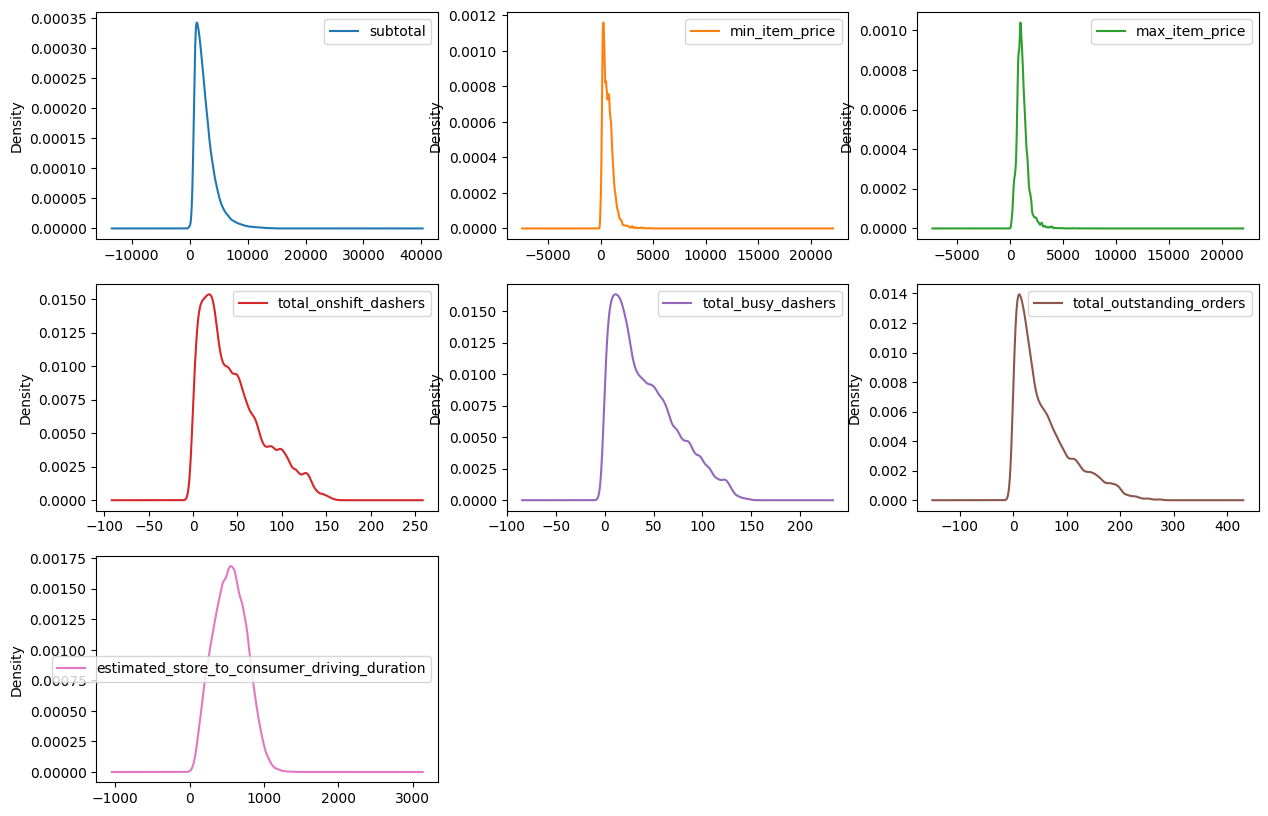

In [20]:
plt.rcParams["figure.figsize"] = [15,10]
num_cols.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [ ]:
# plot categorical columns from cat_cols (exclude timestamps / very high-cardinality)
exclude = ['created_at', 'actual_delivery_time']
cat_candidates = [c for c in cat_cols.columns if c not in exclude and cat_cols[c].nunique() <= 50]

n = len(cat_candidates)
cols = 3
rows = (n + cols - 1) // cols if n else 1
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_candidates):
    ax = axes[i]
    vc = cat_cols[col].value_counts()
    if vc.size > 20:
        order = vc.nlargest(20).index
        sns.countplot(data=cat_cols, x=col, order=order, ax=ax)
        ax.set_title(f"{col} (top 20)")
    else:
        sns.countplot(data=cat_cols, x=col, order=vc.index, ax=ax)
        ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()